# ENGSCI 762 Kaggle Assignment: Prediction Sales Prices
# Part 2
## Reed Bell | rbel068 | rbel068@aucklanduni.ac.nz

### IV Prepare the data


In [559]:
# Imports and global settings
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline
%reload_ext autoreload

pd.options.display.max_rows = 40
pd.options.display.max_columns = 82


In [560]:
# Load test data, setting all NA values to NaN (which can be interpretted in Python)
def load_dataset(csv_path):
    """Loads a dataset with pre-defined settings
    
    :param csv_path: A string containing the relative path to the csv file
    :returns: A pandas dataframe
    """
    
    df = pd.read_csv(csv_path, 
                     index_col=0, 
                     #na_values="NaN", 
                     #keep_default_na=False,
                    )
    return df

train_df = load_dataset("data/train.csv")
test_df = load_dataset("data/test.csv")
train_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


#### Cleaning and filling missing data

In [561]:
# Original white paper of the Ames dataset recommends removing observations above 4000ft^2 in GrLivArea which contains
# abnormal properties (see the scatterplot in part1_notebook)
def remove_outliers(df):
    """Removes Ames dataset outliers
    
    :param df: Pandas dataframe containing GrLivArea column
    :returns: Pandas dataframe with ouliers removed
    """ 
    df = df[df.GrLivArea < 4000]
    return df

train_df = remove_outliers(train_df)
#test_df = remove_outliers(train_df)


In [562]:
# Filling in missing data... Here we go
# There is alot of missing data
def generate_missing_ratio_table(train_df):
    """Generates a table for missing data
    
    :param train_df: The dataframe to find missing data by column
    :returns: None
    """
    train_na = (train_df.isnull().sum() / len(train_df)) * 100
    train_na = train_na.drop(train_na[train_na == 0].index).sort_values()
    train_na_ratio = pd.DataFrame({'Missing Data Percentage' :train_na})
    print(train_na_ratio)
    return None

def fill_and_impute_missing(df):
    """Replaces/Imputes missing data for all variables in the dataset sequentially
    
    :param df: Pandas dataframe containing Ames Dataset
    :returns: Pandas dataframe with missing values imputed/filled in. 
    """
    
    # PoolQC missing data implies no pool
    df["PoolQC"] = df["PoolQC"].fillna("None")
    
    # MiscFeature missin data impies no miscellaneous features
    df["MiscFeature"] = df["MiscFeature"].fillna("None")
    
    # Alley missing data implies no access to alley
    df["Alley"] = df["Alley"].fillna("None")
    
    # Missing Fence data implies no fence
    df["Fence"] = df["Fence"].fillna("None")
    
    # Missing FirePlaceQu implies that the property has no fireplace
    df["FireplaceQu"] = df["FireplaceQu"].fillna("None")
    
    # LotFrontage is a numerical variable. Here we can impute missing data
    # by assigning the median as most properties will have a similar 
    # street length in their neighborhood (filling with zero here doesnt
    # make sense as most properties are connected by streets)
    df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(
        lambda n: n.fillna(n.median())
    )
    
    # the garage variables share identical missing data percentage which implies
    # That missing data means no garage. Numerical variables here are set to 0. 
    df["GarageCond"] = df["GarageCond"].fillna("None")
    df["GarageQual"] = df["GarageQual"].fillna("None")
    df["GarageFinish"] = df["GarageFinish"].fillna("None")
    df["GarageType"] =  df["GarageType"].fillna("None")
    
    df["GarageYrBlt"] = df["GarageYrBlt"].fillna(0)
    df["GarageArea"] = df["GarageArea"].fillna(0)
    df["GarageCars"] = df["GarageCars"].fillna(0)
    
    # Missing data for Basement (Bsmt) associated variables imply no basement
    # This does also mean setting numerical variables to zero as well
    
    for var in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
        df[var] = df[var].fillna('None')
    
    for var in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
        df[var] = df[var].fillna(0)
        
    # Masonry Vaneer (MsVnr) missing data implies lack thereof (both in type and area)
    df["MasVnrType"] = df["MasVnrType"].fillna("None")
    df["MasVnrArea"] = df["MasVnrArea"].fillna(0)
    
    # Electrical is missing only one data point. Since most properties have the same electrical system
    # we will assume this property has the most popular one ("SBrkr")
    df["Electrical"] = df["Electrical"].fillna("SBrkr") 
    
    # Same with Functional and Kitchen (as recommended by the white paper)
    df['Functional'] = df['Functional'].fillna('Typ')
    df['KitchenQual'] = df['KitchenQual'].fillna("TA")

    # For possible missing Exterior data, we take the most popular
    df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
    df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])

    # Sale type is also pretty much the same
    df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])
    
    return df

# Here we combine all data (test and train) just in case there is missing data in the test dataset
# that could go unaccounted for (e.g. Mising data in a variable for test but not in train).
y = train_df.SalePrice.values
all_df = pd.concat((train_df, test_df)).reset_index(drop=True)
all_df.drop(["SalePrice"], axis=1, inplace=True)


generate_missing_ratio_table(all_df)
all_df = fill_and_impute_missing(all_df)
generate_missing_ratio_table(all_df)

              Missing Data Percentage
SaleType                     0.034305
KitchenQual                  0.034305
BsmtFinSF1                   0.034305
BsmtFinSF2                   0.034305
GarageCars                   0.034305
GarageArea                   0.034305
TotalBsmtSF                  0.034305
Exterior2nd                  0.034305
Exterior1st                  0.034305
BsmtUnfSF                    0.034305
Electrical                   0.034305
Functional                   0.068611
Utilities                    0.068611
BsmtHalfBath                 0.068611
BsmtFullBath                 0.068611
MSZoning                     0.137221
MasVnrArea                   0.789022
MasVnrType                   0.823328
BsmtFinType1                 2.710120
BsmtFinType2                 2.744425
BsmtQual                     2.778731
BsmtCond                     2.813036
BsmtExposure                 2.813036
GarageType                   5.385935
GarageYrBlt                  5.454545
GarageFinish

/home/ensamars/usr/dev/prediction-sales-prices-ames-iowa/venv/lib/python3.6/site-packages/ipykernel_launcher.py:89: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



#### Identifying suitable transformations
It is quite apparent that the SalePrice variable on its own is not suitable for most regression tasks

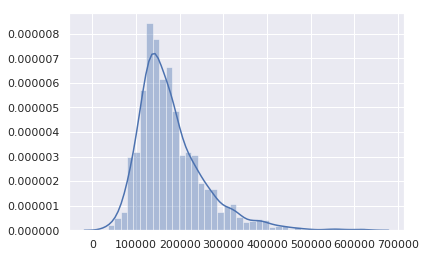

In [563]:
# Visualize distribution of SalePrice
sns.distplot(y)

As we can see, The sale price exhibits positive skewing. Thus the higher frequency of more expensive housing will result in higher than expected prediction for some regressions. Hence, we transform the sales price using a log transform 


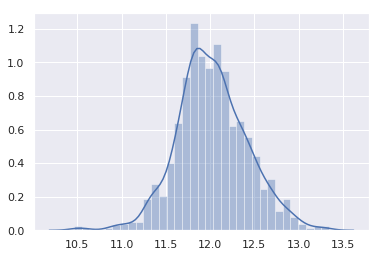

In [564]:
sns.distplot(np.log(y))

Much better. Tails of the distribution are much more even.

We also want to apply numerical scales to numerical variables


#### Converting Variables

The following variables are more catagorical than numerical:
 
 - YrSold  
 - MoSold
 - OverallCond
 - MSSubClass
 
In `YrSold` and `MoSold`, we observe that the both values are in a discrete range (data collected is between 2008 and 2010 and the moth can only be a selection of one of the 12 months). 

While `OverallCond` and `MSSubClass` could be left alone, it is obvious from the data set that the value assigned here are also discrete. 

In [565]:

def turn_numvar_into_catvar(df, nvars):
    for var in nvars:
        df[var] = df[var].astype(str)

    return df

convert = ["YrSold", "MoSold", "OverallCond", "MSSubClass"]
all_df = turn_numvar_into_catvar(all_df, convert)

#### Label encoder
Here we apply Label encoders to the catagorical variables.


In [566]:
from sklearn.preprocessing import LabelEncoder

def label_encoder(df, cvars):
    """Applies generic label encoder to categorical variables
    
    :param df: Dataframe
    :param cvars: List of catagorical variables to transform
    :returns: dataframe with transformed catagorical variables
    """
    for c in cvars:
        enc = LabelEncoder() 
        enc.fit(list(df[c].values)) 
        df[c] = enc.transform(list(df[c].values))

    return df
    
    
cat_vars = ["FireplaceQu", 
            "BsmtQual",
            "BsmtCond", 
            "GarageQual",
            "GarageCond","ExterQual",
            "ExterCond",
            "HeatingQC",
            "PoolQC",
            "KitchenQual",
            "BsmtFinType1",
            "BsmtFinType2",
            "Functional",
            "Fence",
            "BsmtExposure",
            "GarageFinish", 
            "LandSlope",
            "LotShape",
            "PavedDrive",
            "Street",
            "Alley",
            "CentralAir",
            "YrSold",
            "MoSold",
            "MSSubClass",
            "MSZoning",
            "OverallCond",
           ]
all_df = label_encoder(all_df, cat_vars)
all_df

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,1,3,1Fam,4,3,706.0,0.0,2,6,1.0,0.0,2,150.0,1,Norm,Norm,SBrkr,0,4,2,VinylSd,VinylSd,4,3,0,PConc,2,6,548.0,2.0,5,2,5,Attchd,2003.0,1710,1,GasA,0,2Story,1,2,Lvl,0,8450,Inside,65.0,3,0,10,3,196.0,BrkFace,None,0,4,CollgCr,61,4,7,2,0,3,CompShg,Gable,Normal,WD,0,1,8,856.0,AllPub,0,2003,2003,2
1,1262,0,0,1,3,1Fam,4,1,978.0,0.0,0,6,0.0,1.0,2,284.0,1,Feedr,Norm,SBrkr,0,4,3,MetalSd,MetalSd,4,5,1,CBlock,2,6,460.0,2.0,5,2,5,Attchd,1976.0,1262,0,GasA,0,1Story,1,3,Lvl,0,9600,FR2,80.0,3,0,5,3,0.0,None,None,0,7,Veenker,0,7,6,2,0,3,CompShg,Gable,Normal,WD,0,1,6,1262.0,AllPub,298,1976,1976,1
2,920,866,0,1,3,1Fam,4,2,486.0,0.0,2,6,1.0,0.0,2,434.0,1,Norm,Norm,SBrkr,0,4,2,VinylSd,VinylSd,4,5,1,PConc,2,6,608.0,2.0,5,2,5,Attchd,2001.0,1786,1,GasA,0,2Story,1,2,Lvl,0,11250,Inside,68.0,0,0,10,3,162.0,BrkFace,None,0,11,CollgCr,42,4,7,2,0,3,CompShg,Gable,Normal,WD,0,1,6,920.0,AllPub,0,2001,2002,2
3,961,756,0,1,3,1Fam,1,3,216.0,0.0,0,6,1.0,0.0,4,540.0,1,Norm,Norm,SBrkr,272,4,3,Wd Sdng,Wd Shng,4,2,1,BrkTil,1,6,642.0,3.0,5,3,5,Detchd,1998.0,1717,0,GasA,2,2Story,1,2,Lvl,0,9550,Corner,60.0,0,0,11,3,0.0,None,None,0,4,Crawfor,35,4,7,2,0,3,CompShg,Gable,Abnorml,WD,0,1,7,756.0,AllPub,0,1915,1970,0
4,1145,1053,0,1,4,1Fam,4,0,655.0,0.0,2,6,1.0,0.0,2,490.0,1,Norm,Norm,SBrkr,0,4,2,VinylSd,VinylSd,4,5,1,PConc,2,6,836.0,3.0,5,2,5,Attchd,2000.0,2198,1,GasA,0,2Story,1,2,Lvl,0,14260,FR2,84.0,0,0,10,3,350.0,BrkFace,None,0,3,NoRidge,84,4,8,2,0,3,CompShg,Gable,Normal,WD,0,1,9,1145.0,AllPub,192,2000,2000,2
5,796,566,320,1,1,1Fam,4,3,732.0,0.0,2,6,1.0,0.0,2,64.0,1,Norm,Norm,SBrkr,0,4,3,VinylSd,VinylSd,2,3,0,Wood,1,6,480.0,2.0,5,3,5,Attchd,1993.0,1362,1,GasA,0,1.5Fin,1,3,Lvl,0,14115,Inside,85.0,0,0,9,3,0.0,None,Shed,700,1,Mitchel,30,4,5,2,0,3,CompShg,Gable,Normal,WD,0,1,5,796.0,AllPub,40,1993,1995,3
6,1694,0,0,1,3,1Fam,4,0,1369.0,0.0,2,6,1.0,0.0,0,317.0,1,Norm,Norm,SBrkr,0,4,2,VinylSd,VinylSd,4,2,1,PConc,2,6,636.0,2.0,5,2,5,Attchd,2004.0,1694,0,GasA,0,1Story,1,2,Lvl,0,10084,Inside,75.0,3,0,5,3,186.0,Stone,None,0,10,Somerst,57,4,8,2,0,3,CompShg,Gable,Normal,WD,0,1,7,1686.0,AllPub,255,2004,2005,1
7,1107,983,0,1,3,1Fam,4,2,859.0,32.0,0,1,1.0,0.0,2,216.0,1,PosN,Norm,SBrkr,228,4,3,HdBoard,HdBoard,4,5,2,CBlock,2,6,484.0,2.0,5,2,5,Attchd,1973.0,2090,1,GasA,0,2Story,1,3,Lvl,0,10382,Corner,80.0,0,0,10,3,240.0,Stone,Shed,350,2,NWAmes,204,5,7,2,0,3,CompShg,Gable,Normal,WD,0,1,7,1107.0,AllPub,235,1973,1973,3
8,1022,752,0,1,2,1Fam,4,3,0.0,0.0,6,6,0.0,0.0,4,952.0,1,Artery,Norm,FuseF,205,4,3,BrkFace,Wd Shng,4,5,2,BrkTil,2,2,468.0,2.0,5,3,1,Detchd,1931.0,1774,0,GasA,2,1.5Fin,2,3,Lvl,0,6120,Inside,51.0,3,0,9,4,0.0,None,None,0,6,OldTown,0,4,7,2,0,3,CompShg,Gable,Abnorml,WD,0,1,8,952.0,AllPub,90,1931,1950,2
9,1077,0,0,1,2,2fmCon,4,3,851.0,0.0,2,6,1.0,0.0,4,140.0,1,Artery,Artery,SBrkr,0,4,3,MetalSd,MetalSd,4,5,2,BrkTil,1,6,205.0,1.0,5,2,2,Attchd,1939.0,1077,0,GasA,0,1.5Unf,2,3,Lvl,0,7420,Corner,50.0,3,0,4,3,0.0,None,None,0,0,BrkSide,4,5,5,2,0,3,CompShg,Gable,Normal,WD,0,1,5,991.0,AllPub,0,1939,1950,2


#### Creating new variables
The paper mentions positive correlation across the board with area realated features. Thus it would be sensible to create a total area variable that includes all area features (of the main property as Garage data doesn't appear to help according to the correlation matrix in part1)


In [567]:
all_df["TotalAreaSF"] = all_df["1stFlrSF"] + all_df["2ndFlrSF"] + all_df["TotalBsmtSF"]


#### Numerical transformations (Again)
after making our conversions and making new variables, we now apply a standard numerical scaler

In [568]:
from sklearn.preprocessing import StandardScaler

def numeric_scaler(df, nvars):
    """Applies generic scaler to numeric variables
    
    :param df: Dataframe
    :param nvars: List of numerical variables to transform
    :returns: dataframe with transformed numeric variables
    """
    scale = StandardScaler()
    df[nvars] = scale.fit_transform(df[nvars])
    return df

    
num_vars = [var for var in all_df.columns if all_df[var].dtype != "object"]
all_df = numeric_scaler(all_df, num_vars)


final_df = pd.get_dummies(all_df).reset_index(drop=True)


/home/ensamars/usr/dev/prediction-sales-prices-ames-iowa/venv/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/ensamars/usr/dev/prediction-sales-prices-ames-iowa/venv/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


### V Evaluate three different regression algorithms




In [569]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

param_grid = {'fit_intercept': [True, False],
             'normalize': [True, False]}

y = np.log(y)
train_df_scaled = final_df.iloc[:len(y), :]
test_df_scaled = final_df.iloc[len(y):, :]
train_df_scaled 


,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,EnclosedPorch,ExterCond,ExterQual,Fence,FireplaceQu,Fireplaces,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageYrBlt,GrLivArea,HalfBath,HeatingQC,KitchenAbvGr,KitchenQual,LandSlope,LotArea,LotFrontage,LotShape,LowQualFinSF,MSSubClass,...,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Utilities_AllPub,Utilities_NoSeWa
0,-0.783611,1.218793,-0.103402,0.055368,0.170991,0.333786,0.582809,0.605365,-0.293244,-0.529794,0.353808,1.090324,-0.249126,-0.544136,-0.933519,0.268487,-0.359879,0.376756,-0.764443,0.463914,-0.063609,-0.924457,0.786564,0.256994,0.354109,0.309022,0.293767,0.102542,0.326939,0.295217,0.435171,1.234732,-0.881397,-0.207847,-0.421866,-0.216416,-0.215718,-0.207742,0.745482,-0.101267,0.775791,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
1,0.273981,-0.785698,-0.103402,0.055368,0.170991,0.333786,-1.156074,1.219645,-0.293244,-1.424292,0.353808,-0.818562,3.830667,-0.544136,-0.628749,0.268487,-0.359879,0.376756,0.668580,0.463914,1.685648,0.628738,0.786564,0.256994,-0.055951,0.309022,0.293767,0.102542,0.326939,0.235202,-0.476964,-0.754900,-0.881397,-0.207847,0.782580,-0.216416,-0.068374,0.502047,0.745482,-0.101267,-0.575931,...,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
2,-0.616897,1.246959,-0.103402,0.055368,0.170991,0.333786,-0.286632,0.108520,-0.293244,-0.529794,0.353808,1.090324,-0.249126,-0.544136,-0.287589,0.268487,-0.359879,0.376756,-0.764443,0.463914,1.685648,0.628738,0.786564,0.256994,0.633695,0.309022,0.293767,0.102542,0.326939,0.290771,0.589908,1.234732,-0.881397,-0.207847,-0.421866,-0.216416,0.143033,-0.065784,-1.383597,-0.101267,0.775791,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
3,-0.510096,0.988770,-0.103402,0.055368,0.170991,-2.735575,0.582809,-0.501244,-0.293244,-1.424292,0.353808,1.090324,-0.249126,1.002579,-0.046502,0.268487,3.872161,0.376756,0.668580,0.463914,-0.938238,0.628738,-1.027387,0.256994,0.792128,1.622141,0.293767,0.935163,0.326939,0.284103,0.449423,-0.754900,0.266368,-0.207847,-0.421866,-0.216416,-0.074780,-0.444338,-1.383597,-0.101267,1.046136,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
4,-0.030793,1.685882,-0.103402,0.055368,1.386699,0.333786,-2.025516,0.490187,-0.293244,-0.529794,0.353808,1.090324,-0.249126,-0.544136,-0.160222,0.268487,-0.359879,0.376756,-0.764443,0.463914,1.685648,0.628738,0.786564,0.256994,1.696123,1.622141,0.293767,0.102542,0.326939,0.288548,1.428747,1.234732,-0.881397,-0.207847,-0.421866,-0.216416,0.528690,0.691324,-1.383597,-0.101267,0.775791,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
5,-0.939906,0.542806,12.594536,0.055368,-2.260424,0.333786,0.582809,0.664083,-0.293244,-0.529794,0.353808,1.090324,-0.249126,-0.544136,-1.129117,0.268487,-0.359879,0.376756,0.668580,-1.368484,-0.063609,-0.924457,-1.027387,0.256994,0.037245,0.309022,0.293767,0.935163,0.326939,0.272989,-0.273363,1.234732,-0.881397,-0.207847,0.782580,-0.216416,0.510112,0.738643,-1.383597,-0.101267,0.505447,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,

In [570]:
lin_reg = LinearRegression()
lin_search = GridSearchCV(lin_reg, param_grid, cv=10, 
                          scoring = 'neg_mean_squared_error')


lin_search.fit(train_df_scaled, y)
np.sqrt(-lin_search.best_score_)
lin_search.best_params_



in_sample_mse = mean_squared_error(y, 
                           lin_search.predict(train_df_scaled))



lin_reg_rmse = pd.Series({'in sample': np.sqrt(in_sample_mse),
                         'out of sample': np.sqrt(-lin_search.best_score_)})
lin_reg_rmse 




/home/ensamars/usr/dev/prediction-sales-prices-ames-iowa/venv/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


in sample        9.820934e-02
out of sample    3.119866e+09
dtype: float64

#### Linear Regression Results
The Linear regression performed extremely poorly in the out of sample tests. This indicates severe overfitting as in-sample RSME is relatively low. This could be due to my relatively wide data and maintaining variables that do not change that often like `Electrical`

In [571]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
              {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
             ]
forest_reg = RandomForestRegressor()
rfr_search = GridSearchCV(forest_reg, param_grid, cv=10, scoring='neg_mean_squared_error')

rfr_search.fit(train_df_scaled, y)


rfr_in_sample_mse = mean_squared_error(y, 
                           rfr_search.predict(train_df_scaled))


np.sqrt(-rfr_search.best_score_)

rfr_reg_rmse = pd.Series({'in sample': np.sqrt(rfr_in_sample_mse),
                         'out of sample': np.sqrt(-rfr_search.best_score_)})
rfr_reg_rmse 


in sample        0.057364
out of sample    0.146152
dtype: float64

#### Random Forest Results
Random forest performs remarkably better thatn Linear Regression. Here we observe that out of sample error is still ~3 times higher than in sample. However, the ability for Random Forest make effective decisions on catagorical variables (and being able to prune some on its own) helps in reducing the rsme.

In [572]:
from sklearn.svm import LinearSVR

svr = LinearSVR(max_iter=100000)
svr.fit(train_df_scaled, y)

svr_in_sample_mse = mean_squared_error(y,
                                      svr.predict(train_df_scaled))

svr_reg_rmse = pd.Series({'in sample': np.sqrt(svr_in_sample_mse),
                         'out of sample': np.nan})
svr_reg_rmse 





in sample        0.105308
out of sample         NaN
dtype: float64

#### SVM/SVR results

Here we observe that SVR displays similar results to Linear Regression. Again like Random Forest, the performance of SVM is likely attributed to its ability to be more distinctive with catagorical variables. Unlike linear regression, SVM is better able to classify more nuanced/non-linear relationships between variables. 

### Conclusion

I will generate my predictions using the Random Forest Regression as it is best able to distinguish pricing through catagorical variables. Out of sample error rate suggests good performance for the test dataset.

In [573]:
y_test = pd.Series(rfr_search.predict(test_df_scaled),
                  name='SalePrice')
y_test_backtransform = np.exp(y_test)

In [574]:
y_test_backtransform.index = test_df.index 
y_test_backtransform.to_csv("res/prediction.csv", header=True)



#### Results 
![submission](images/submission.png)
![leaderboard](images/leaderboard.png)